<td>
<a href="https://colab.research.google.com/github/raoulg/MADS-DAV/blob/main/notebooks/06.1-dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</td>

# SVD and PCA
Singular Value Decomposition, or SVD for short, is a mathematical technique that decomposes a matrix into three simpler matrices. Imagine you have a large, complex puzzle; SVD helps you break it down into smaller, easier-to-understand pieces.

Single Value Decomposition (SVD) is defined like this:

$$X = U \Sigma V^T$$

U (left singular vectors): This is a matrix that contains information about the patterns and relationships between the rows of the original matrix.

Σ (singular values): This is a diagonal matrix with non-negative numbers, which can be seen as the "strength" or "importance" of each pattern found by U and V. The singular values are sorted from largest to smallest, showing the ranking of the importance of each pattern.

V^T (right singular vectors, transpose of V): This is a matrix that contains information about the patterns and relationships between the columns of the original matrix.

What are some applications where you could encounter SVD?

1. Data compression: SVD can help you reduce the size of the data without losing much information. By keeping only the largest singular values (and associated vectors), you can get a compact version of your original matrix.
2. Noise reduction: SVD can help remove noise from data. In this context, noise is represented by the components with smaller singular values that you can discard, leaving you with the more significant, stronger signals in your data.
3. Latent semantic analysis: In natural language processing, SVD is used to understand the relationships between documents and terms in text data, helping to find the hidden (or "latent") concepts.
4. Principal Component Analysis (PCA): In machine learning, SVD is used as part of PCA, which is a method that reduces the dimensionality of data while retaining most of the variation in the dataset.

SVD is like a Swiss Army knife for matrices

## Explanation of some terminology

$U$ provides an orthonormal basis for the column space of $X$, and V provides an orthonormal basis for the row space of $X$.

Some explanation of what an orthonormal basis means in simple terms:

- *Orthogonal*: Each line is at a 90-degree angle to the others, like the corners of a room. One line goes from wall to wall, another from floor to ceiling, and another from one corner of the room to the opposite corner if it's a 3D space. They don't lean toward each other at all. This is how we typically think of axis lines in a graph. Note that they don't NEED to be at a 90 degree angle, but it doesnt make much sense to have them at any other angle.

- *Normalized*: Each line has been stretched or shrunk to exactly the same length. Let's say we've decided that the length is the length of a meter stick. So, if you were to walk from the center of the room to the wall following one of these lines, you'd always walk exactly one meter, no matter which line you chose.

- *Basis*: Using these lines, you can reach any point in the room by walking along them one at a time. In a grid with 3D axis, the basis would be the vectors (0,0,1), (0,1,0) and (1,0,0). If you want to reach any point in the room, you can reach it by combining these three vectors.

The key characteristics of a basis are:
- *Coverage*: A basis must be able to reach or "span" every point in the space. Just like with our north and east directions on the floor, by going some amount north and some amount east, you can reach any point on the floor. If you were in a three-dimensional room, you'd also need an up-and-down direction to reach every point.

- *Independence*: The directions in a basis must be independent of each other, meaning you can't create one direction just by using a combination of the others. On our floor, you can't get a north direction just by walking east or vice versa; they're completely separate.

# Examples

This is an illustration of how minimizing the distance of the red dotted line is the same as maximizing the green dotted line.

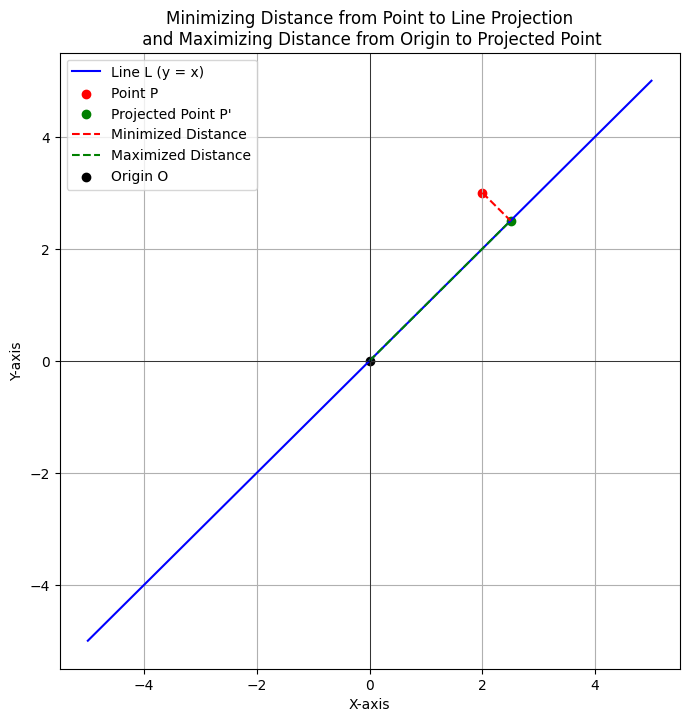

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the line L (y = mx + c form)
m, c = 1, 0  # slope and y-intercept
x = np.linspace(-5, 5, 400)
y = m * x + c

# Define the point P
P = np.array([2, 3])

# Calculate the projection P' onto the line L
# Line's normal vector
normal = np.array([-m, 1])
# Projection of P onto the line (using dot product)
P_proj = P - np.dot(P, normal) / np.dot(normal, normal) * normal

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Line L (y = x)", color="blue")  # Line
plt.scatter(*P, color="red", label="Point P")  # Point P
plt.scatter(*P_proj, color="green", label="Projected Point P'")  # Projected Point P'
plt.plot(
    [P[0], P_proj[0]],
    [P[1], P_proj[1]],
    color="red",
    linestyle="--",
    label="Minimized Distance",
)  # Minimized Distance
plt.plot(
    [0, P_proj[0]],
    [0, P_proj[1]],
    color="green",
    linestyle="--",
    label="Maximized Distance",
)  # Maximized Distance

# Annotations and decorations
plt.scatter(0, 0, color="black", label="Origin O")  # Origin
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.grid(True)
plt.legend()
plt.title(
    "Minimizing Distance from Point to Line Projection\n and Maximizing Distance from Origin to Projected Point"
)

# Show plot
plt.show()

Lets make some synthetic data

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def synthetic_data(seed: int = 42, m: int = 60) -> np.array:
    np.random.seed(seed)
    # two weigths
    w1, w2 = 0.1, 0.3
    # some noise
    noise = 0.1

    # m random angles
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    X = np.empty((m, 3))
    X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
    X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)
    return X


X = synthetic_data(seed=4, m=100)

Run a SVD on it with numpy

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
U.shape, s.shape, Vt.shape

((100, 100), (3,), (3, 3))

And lets visualize both the data, and the eigenvectors

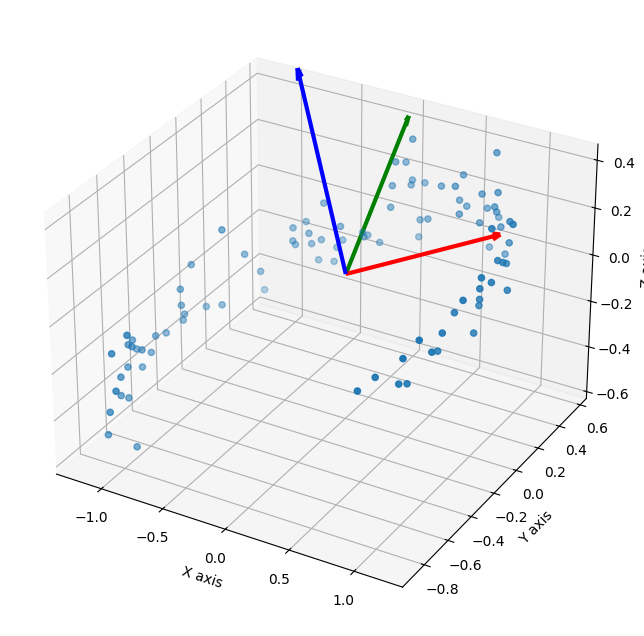

In [4]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of the original data
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])

# The principal components are the rows of Vt. We scale them by the square root of the eigenvalues (s**2).
for i in range(Vt.shape[0]):
    # Start the line in the middle of the data
    start_point = np.zeros(3)
    # The end of the line is the direction of the principal component
    end_point = Vt[i, :]
    # Plot the principal components as lines
    ax.quiver(
        start_point[0],
        start_point[1],
        start_point[2],
        end_point[0],
        end_point[1],
        end_point[2],
        color=["r", "g", "b"][i],
        arrow_length_ratio=0.05,
        linewidths=3,
    )

# Set labels for axes
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Show the plot
plt.show()

As you can see, the data (blue points) are spread out over a diagonal surface. With SVD we are able to find three vectors that are orthogonal to each other, and that span the space of the data. They also make intuitively the most sense; the red vector covers more of the data than the X or Y axis does.

We can take the first two eigenvectors and project the data onto them

In [5]:
W2 = Vt.T[:, :2]
X2D_svd = X_centered.dot(W2)
X2D_svd.shape

(100, 2)

Lets visualize the result

<Axes: >

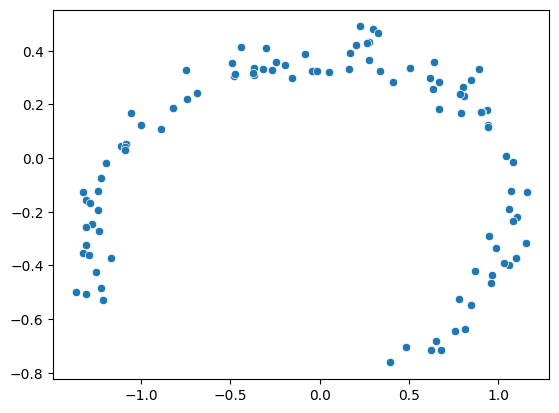

In [6]:
import seaborn as sns

sns.scatterplot(x=X2D_svd[:, 0], y=X2D_svd[:, 1])

As you can see, this is a nice way to "project" the data onto a lower dimension (in this case, from 3D to 2D) while retaining most of the information. This is the basis of PCA.
Now, PCA with two components should give the same result:

<Axes: >

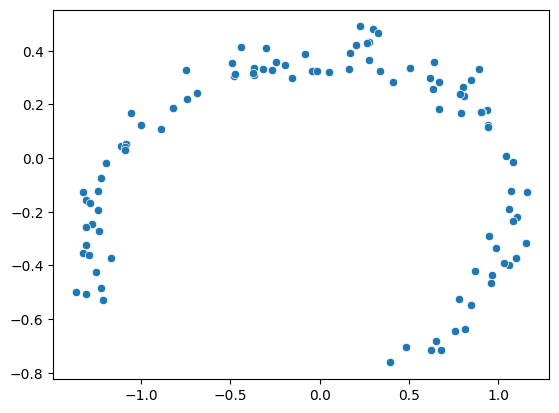

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1])

Even though the y-axis is flipped, the data is the same

In [8]:
np.allclose(X2D_svd, -X2D)

False

We can look up the explained variance ratio

In [9]:
pca.explained_variance_ratio_

array([0.84763592, 0.1418223 ])

Which is something we can also calculate from the SVD, by taking the square of the singular values, and dividing by the sum of the squares of the singular values

In [10]:
np.square(s) / np.sum(np.square(s))

array([0.84763592, 0.1418223 , 0.01054178])

# The Swiss roll
Let's have a look at a synthetic dataset known as the swiss roll

Text(0.5, 0.92, 'Swiss Roll Dataset')

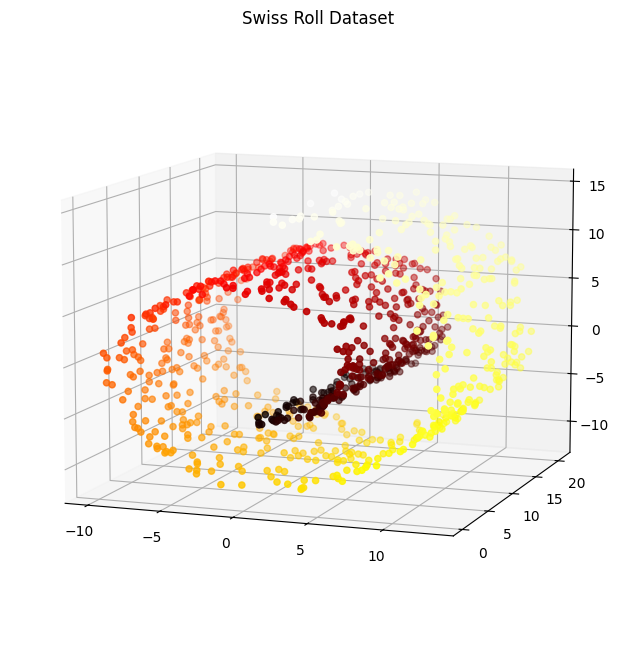

In [11]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_title("Swiss Roll Dataset")

And run PCA on it

<Axes: >

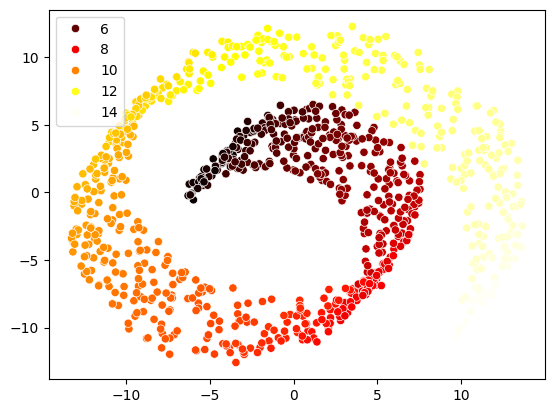

In [12]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1], hue=t, palette=plt.cm.hot)

Now, lets try t-SNE to visualize

<Axes: >

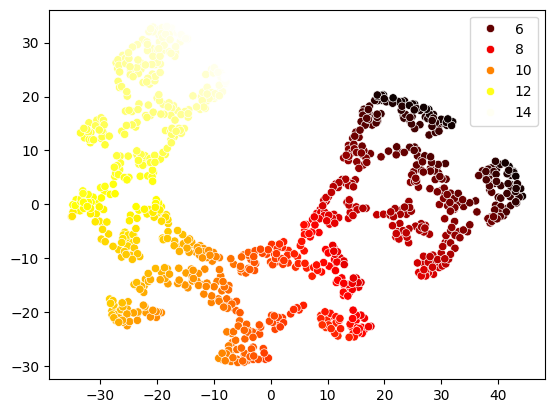

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X2D = tsne.fit_transform(X)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1], hue=t, palette=plt.cm.hot)

It's pretty different! But the real value of t-SNE is that it can be used to visualize high-dimensional data, where the manifold is very complex and non-linear.

First, download the data

In [14]:
from pathlib import Path

from sklearn.datasets import fetch_openml

cache = Path.home() / ".cache/mads_datasets"
if not cache.exists():
    cache.mkdir(parents=True)


mnist = fetch_openml("mnist_784", version=1, as_frame=False, data_home=str(cache))
mnist.target = mnist.target.astype(np.uint8)

<Axes: >

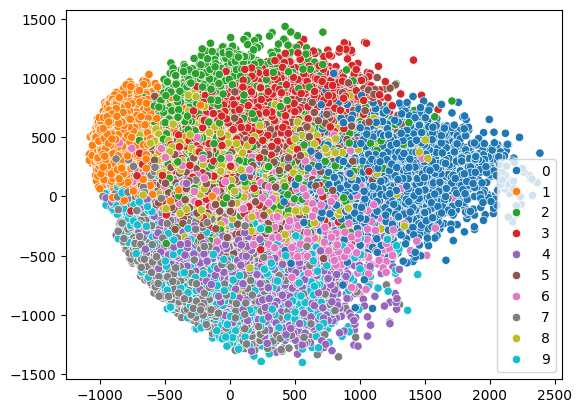

In [15]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
pca = PCA(n_components=0.95)
X2D = pca.fit_transform(X_train)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1], hue=y_train, palette="tab10")

Okay, well, PCA does something, but it's not very useful in two dimensions... Now lets try t-SNE.

<Axes: >

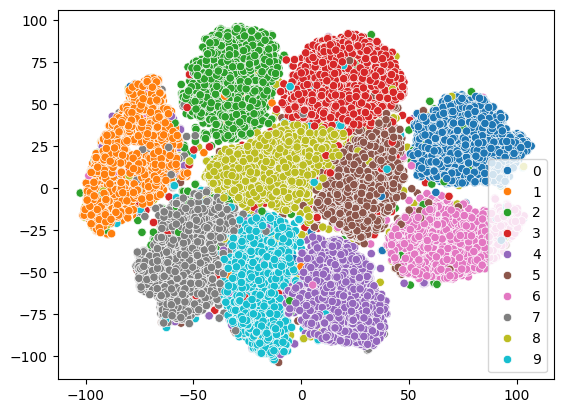

In [16]:
tsne = TSNE(n_components=2, random_state=42)
X2D = tsne.fit_transform(X_train)
sns.scatterplot(x=X2D[:, 0], y=X2D[:, 1], hue=y_train, palette="tab10")

It does take a lot longer, but the result is much much better for visualisation purposes!